In [150]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pickle
tf.config.optimizer.set_jit(True)
print(tf.__version__)

2.1.0


In [151]:
train_images = pickle.load(open("training_flower_images.pickle","rb"))
train_labels = pickle.load(open("training_flower_labels.pickle","rb"))

test_images = pickle.load(open("test_flower_images.pickle","rb"))
test_labels = pickle.load(open("test_flower_labels.pickle","rb"))

In [152]:
CATEGORIES = ["daisy","dandelion","roses","sunflowers","tulips"]
IMAGE_SIZE = 150

dandelion


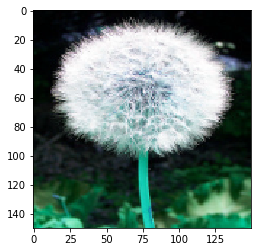

In [153]:
plt.imshow(train_images[0].reshape(IMAGE_SIZE,IMAGE_SIZE,3))
print(CATEGORIES[train_labels[0]])

In [154]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu, input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu, input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),                                    
    keras.layers.Dense(128,activation=tf.nn.relu),                                
    keras.layers.Dense(len(CATEGORIES))
])

In [155]:
model.compile(optimizer="adam",loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [156]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 15, 15, 128)     

In [158]:
model.fit(train_images,train_labels,batch_size=32,epochs=20)

Train on 8256 samples
Epoch 1/20
8256/8256 [==============================] - 185s 22ms/sample - loss: 1.4762 - accuracy: 0.3366
Epoch 2/20
8256/8256 [==============================] - 175s 21ms/sample - loss: 1.1173 - accuracy: 0.5346
Epoch 3/20
8256/8256 [==============================] - 188s 23ms/sample - loss: 0.9659 - accuracy: 0.6118
Epoch 4/20
8256/8256 [==============================] - 184s 22ms/sample - loss: 0.8631 - accuracy: 0.6605
Epoch 5/20
8256/8256 [==============================] - 173s 21ms/sample - loss: 0.8059 - accuracy: 0.6842
Epoch 6/20
8256/8256 [==============================] - 165s 20ms/sample - loss: 0.7254 - accuracy: 0.7175
Epoch 7/20
8256/8256 [==============================] - 172s 21ms/sample - loss: 0.6802 - accuracy: 0.7356
Epoch 8/20
8256/8256 [==============================] - 197s 24ms/sample - loss: 0.6360 - accuracy: 0.7563
Epoch 9/20
8256/8256 [==============================] - 193s 23ms/sample - loss: 0.5912 - accuracy: 0.7757
Epoch 10/20
825

In [159]:
model.evaluate(test_images,test_labels)

2751/2751 [==============================] - 15s 5ms/sample - loss: 0.8603 - accuracy: 0.7354


[0.8603315990823089, 0.73536897]